In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Stage 2

## Task 1

Compare the weekly statistics (Mean, Median, Mode) for cases and deaths across the US.

In [66]:
super_covid = pd.read_csv('./data/super_covid_data.csv')
covid_cases = pd.read_csv('./data/covid_confirmed_usafacts.csv')
covid_deaths = pd.read_csv('./data/covid_deaths_usafacts.csv')

# It will be easier to handle these separately so I'm importing the deaths and cases CSVs again.

# Create a dataframe I actually want to manipulate
cd_date = covid_deaths.drop(covid_deaths.columns[[0,1,2,3]], axis=1, inplace=False)

#Transpose
cd_date = cd_date.transpose()

# Rename the columns after the countyFIPS so that I can merge later.
cd_date.columns = covid_deaths['countyFIPS']

# Change the index to a date and time so that I can resample it.
cd_date.index = pd.to_datetime(cd_date.index)

#Repeat this process for Cases
cc_date = covid_cases.drop(covid_cases.columns[[0,1,2,3]], axis=1, inplace=False)
cc_date = cc_date.transpose()
cc_date.columns = covid_cases['countyFIPS']
cc_date.index = pd.to_datetime(cc_date.index)


start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')

cd_date = cd_date.T
cd_date = cd_date[[col for col in cd_date.columns if start_date <= col <= end_date]]

cc_date = cc_date.T
cc_date = cc_date[[col for col in cc_date.columns if start_date <= col <= end_date]]

cd_last_date = cd_date.iloc[:, -1:]
cd_date = cd_date.loc[:, ::7]
cd_date = pd.concat([cd_date, cd_last_date], axis=1)
cd_date

,2020-06-01,2020-06-08,2020-06-15,2020-06-22,2020-06-29,2020-07-06,2020-07-13,2020-07-20,2020-07-27,2020-08-03,...,2020-11-02,2020-11-09,2020-11-16,2020-11-23,2020-11-30,2020-12-07,2020-12-14,2020-12-21,2020-12-28,2021-01-03
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,5,5,6,9,12,13,16,21,21,21,...,30,30,36,39,41,41,41,44,47,50
1003,9,9,9,9,10,10,12,15,18,24,...,71,83,84,84,98,138,141,147,152,169
1005,1,1,1,1,1,2,2,4,4,5,...,9,9,9,10,11,29,30,32,32,33
1007,1,1,1,1,1,1,1,2,2,3,...,15,16,17,17,17,39,39,42,42,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0,0,0,0,0,0,0,2,2,2,...,2,4,4,6,6,11,14,15,15,16
56039,1,1,1,1,1,1,1,1,1,1,...,1,2,2,2,2,2,2,2,3,4
56041,0,0,0,0,0,0,0,0,0,0,...,3,3,4,4,4,6,7,7,7,7


Text(0, 0.5, 'Cases')

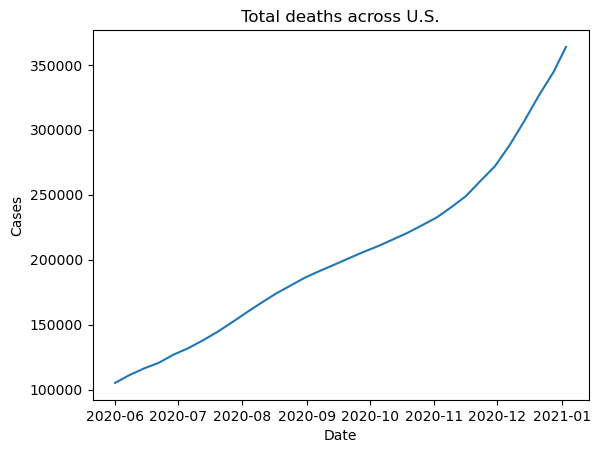

In [70]:
cd_date_total = cd_date.T.sum(axis=1)
plt.plot(cd_date_total)
plt.title('Total deaths across U.S.')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

Text(0, 0.5, 'Cases')

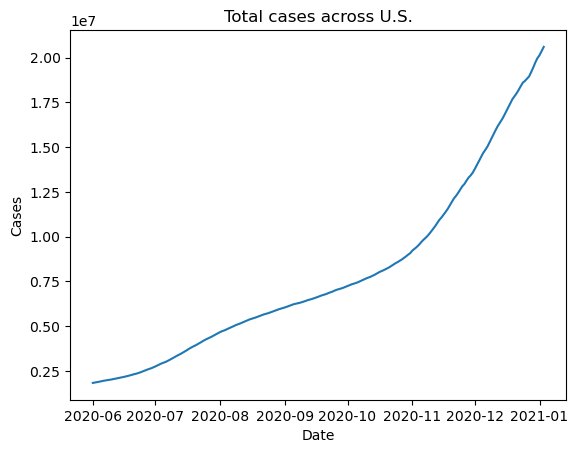

In [71]:
cc_date_total = cc_date.T.sum(axis=1)
plt.plot(cc_date_total)
plt.title('Total cases across U.S.')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

Text(0, 0.5, 'Deaths')

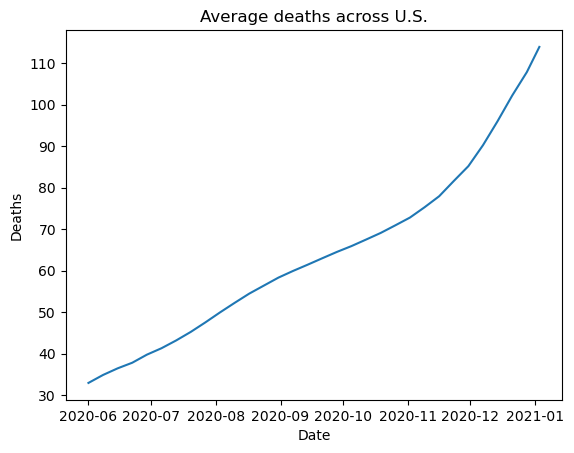

In [72]:
cd_date_mean = cd_date.T.mean(axis=1)
plt.plot(cd_date_mean)
plt.title('Average deaths across U.S.')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.show()

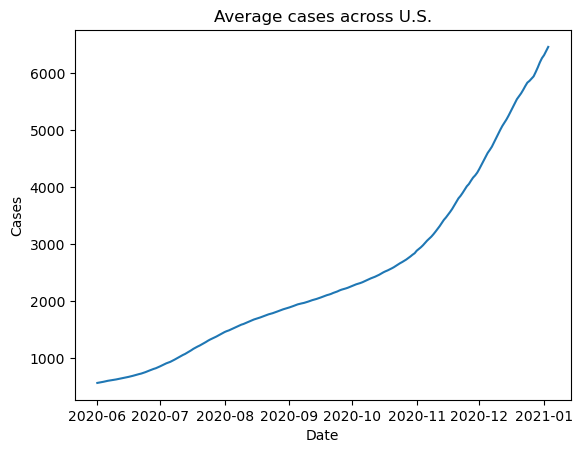

In [73]:
cc_date_mean = cc_date.T.mean(axis=1)
plt.plot(cc_date_mean)
plt.title('Average cases across U.S.')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()